## Single-disease analysis of alveolar fibroblasts in IPF

This notebook subsets to Alvolar Fibroblasts from our IPF subsetted data.

#### Structure

* [Global variables and paths](#bullet1)
* [Loading data](#bullet2)
* [Pre-processing](#bullet3)
* [Main](#bullet4)
* [Conclusions](#bullet5)
* [Save](#bullet6)

### Environment setup

In [1]:
%load_ext autoreload
%autoreload 2
import importlib

spam_spec = importlib.util.find_spec("lab_black")
if spam_spec is not None:
    %load_ext lab_black

In [2]:
# basic modules
import os, re, time
import sys, warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [3]:
# in-house/developing modules
# tools modules
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
7b32b9a39ad70713acde__mypyc NA
PIL                         9.2.0
autoreload                  NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
black                       22.6.0
blib2to3                    NA
cffi                        1.15.1
click                       8.1.3
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.3
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.16.0
ipython_genutils            0.2.0
ipywidgets                  8.0.2
jedi                        0.18.1
joblib                      1.1.0
jupyter_server              1.21.0
kiwisolver                  1.4.4
lab_black                   NA
leidenalg                   0.8.10
llvmlite       

In [4]:
# setting visualisation parameters
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(10, 10))

In [5]:
print("Environment:", re.sub(".os.py", "", os.__file__))
parentpath = lambda _path, n: os.sep.join(_path.split(os.sep)[:-n])
print("Working at:", re.sub(parentpath(os.getcwd(), 2), "", os.getcwd()))

Environment: /home/icb/ciro.suastegui/miniconda3/envs/HLCA_basic/lib/python3.7
Working at: /3_atlas_extension/disease


### Global variables and paths

**Inputs**

In [54]:
embed_inp = (
    "../../../data/HLCA_extended/extension_disease/scarches_emb_ipf_all-celltypes.h5ad"
)
annot_inp = "../../../results/HLCA_ext_label_transfer/transfered_labels_query_only.csv"

**Outputs**

In [ ]:
embed_out = "../../../data/HLCA_extended/extension_disease/scarches_emb_ipf_alveolar-fibroblasts.h5ad"

: 

### Loading data <a class="anchor" id="bullet2"></a>

In [13]:
embed = sc.read(embed_inp)

In [14]:
embed

AnnData object with n_obs × n_vars = 988961 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new'

In [15]:
del embed.obsm
del embed.obsp

In [16]:
annot_pred = pd.read_csv(annot_inp, index_col=0)

In [17]:
annot_pred

most_confident_level  \
001C_AAACCTGCATCGGGTC_adams                        Level_3   
001C_AAACCTGTCAACACCA_adams                        Level_4   
001C_AAACCTGTCACAGTAC_adams                        Level_2   
001C_AAACCTGTCTGTCTAT_adams                        Level_2   
001C_AAACGGGAGACTAAGT_adams                        Level_5   
...                                                    ...   
TTTGATCTCGGAATTC-1_DD073R_tata_unpubl              Level_3   
TTTGGAGAGGATTTAG-1_DD073R_tata_unpubl              Level_2   
TTTGGTTCACGACGCT-1_DD073R_tata_unpubl              Level_2   
TTTGGTTGTGATACAA-1_DD073R_tata_unpubl              Level_5   
TTTGGTTGTGGAATGC-1_DD073R_tata_unpubl              Level_1   

                                       most_confident_uncert  \
001C_AAACCTGCATCGGGTC_adams                     0.000000e+00   
001C_AAACCTGTCAACACCA_adams                     0.000000e+00   
001C_AAACCTGTCACAGTAC_adams                     5.960464e-08   
001C_AAACCTGTCTGTCTAT_adams                     0.000000e+00   
001C_AAACGGGAGACTAAGT_adams                     5.960464e-08   
...                                                      ...   
TTTGATCTCGGAATTC-1_DD073R_tata_unpubl           0.000000e+00   
TTTGGAGAGGATTTAG-1_DD073R_tata_unpubl           0.000000e+00   
TTTGGTTCACGACGCT-1_DD073R_tata_unpubl           0.000000e+00   
TTTGGTTGTGATACAA-1_DD073R_tata_unpubl           0.000000e+00   
TTTGGTTGTGGAATGC-1_DD073R_tata_unpubl           0.000000e+00   

                                         most_confident_label  \
001C_AAACCTGCATCGGGTC_adams                         Monocytes   
001C_AAACCTGTCAACACCA_adams              Alveolar macrophages   
001C_AAACCTGTCACAGTAC_adams                          Lymphoid   
001C_AAACCTGTCTGTCTAT_adams                           Myeloid   
001C_AAACGGGAGACTAAGT_adams             3_Lymphatic EC mature   
...                                                       ...   
TTTGATCTCGGAATTC-1_DD073R_tata_unpubl             Fibroblasts   
TTTGGAGAGGATTTAG-1_DD073R_tata_unpubl           Smooth muscle   
TTTGGTTCACGACGCT-1_DD073R_tata_unpubl      Fibroblast lineage   
TTTGGTTGTGATACAA-1_DD073R_tata_unpubl  4_Alveolar fibroblasts   
TTTGGTTGTGGAATGC-1_DD073R_tata_unpubl                  Stroma   

                                       transf_ann_level_5_uncert  \
001C_AAACCTGCATCGGGTC_adams                         1.400267e-01   
001C_AAACCTGTCAACACCA_adams                         2.600470e-01   
001C_AAACCTGTCACAGTAC_adams                         2.200202e-01   
001C_AAACCTGTCTGTCTAT_adams                         2.799665e-01   
001C_AAACGGGAGACTAAGT_adams                         5.960464e-08   
...                                                          ...   
TTTGATCTCGGAATTC-1_DD073R_tata_unpubl               5.998033e-02   
TTTGGAGAGGATTTAG-1_DD073R_tata_unpubl               6.000769e-02   
TTTGGTTCACGACGCT-1_DD073R_tata_unpubl               1.199936e-01   
TTTGGTTGTGATACAA-1_DD073R_tata_unpubl               0.000000e+00   
TTTGGTTGTGGAATGC-1_DD073R_tata_unpubl               2.599888e-01   

                                          transf_ann_level_5_label  \
001C_AAACCTGCATCGGGTC_adams              4_Non-classical monocytes   
001C_AAACCTGTCAACACCA_adams                 4_Alveolar macrophages   
001C_AAACCTGTCACAGTAC_adams                             4_NK cells   
001C_AAACCTGTCTGTCTAT_adams                   Monocyte-derived Mph   
001C_AAACGGGAGACTAAGT_adams                  3_Lymphatic EC mature   
...                                                            ...   
TTTGATCTCGGAATTC-1_DD073R_tata_unpubl       4_Alveolar fibroblasts   
TTTGGAGAGGATTTAG-1_DD073R_tata_unpubl      3_Smooth muscle FAM83D+   
TTTGGTTCACGACGCT-1_DD073R_tata_unpubl  4_Peribronchial fibroblasts   
TTTGGTTGTGATACAA-1_DD073R_tata_unpubl       4_Alveolar fibroblasts   
TTTGGTTGTGGAATGC-1_DD073R_tata_unpubl              2_Smooth muscle   

                                       transf_ann_level_4_uncert  \
001C_AAACCTGCATCG

### Pre-processing <a class="anchor" id="bullet3"></a>

In [18]:
index_intersect = list(set(embed.obs.index) & set(annot_pred.index))
print("Intersection with prediction:", len(index_intersect))
embed.obs.core_or_extension.value_counts()

Intersection with prediction: 404017


core         584944
extension    404017
Name: core_or_extension, dtype: int64

Getting the columns we need for the annotation at different levels.

In [19]:
temp = [not i in embed.obs.columns for i in annot_pred.columns]
embed.obs = pd.concat([embed.obs, annot_pred.loc[index_intersect, temp]], axis=1)

In [20]:
for column_i in list(
    filter(re.compile(r"transf_ann_level_._label").search, embed.obs.columns)
):
    print("--------------------", column_i)
    embed.obs[column_i] = embed.obs[column_i].astype(str)
    embed.obs[re.sub("transf_|_label", "", column_i)] = embed.obs[
        re.sub("transf_|_label", "", column_i)
    ].astype(str)
    temp = embed.obs[column_i] == "nan"
    embed.obs["celltype"] = embed.obs[column_i]
    embed.obs.loc[temp, "celltype"] = embed.obs.loc[
        temp, re.sub("transf_|_label", "", column_i)
    ]
    embed.obs[column_i] = embed.obs["celltype"]

-------------------- transf_ann_level_5_label
-------------------- transf_ann_level_4_label
-------------------- transf_ann_level_3_label
-------------------- transf_ann_level_2_label
-------------------- transf_ann_level_1_label


In [21]:
embed.obs[
    [column_i, re.sub("transf_|_label", "", column_i), "celltype", "core_or_extension"]
]

transf_ann_level_1_label ann_level_1    celltype  \
GCGACCATCCCTAACC_SC22                          Immune      Immune      Immune   
P2_1_GCGCAACCAGTTAACC                          Immune      Immune      Immune   
GCTCTGTAGTGCTGCC_SC27                      Epithelial  Epithelial  Epithelial   
P2_8_TTAGGACGTTCAGGCC                          Immune      Immune      Immune   
CTTGATTGTCAGTTTG_T164                      Epithelial  Epithelial  Epithelial   
...                                               ...         ...         ...   
CTGATCCGTTAAGGGC_IPF3_tsukui                   Immune         nan      Immune   
AGCAGCCAGTACGCCC_IPF3_tsukui                   Stroma         nan      Stroma   
TCAGCTCTCTAGCACA_IPF3_tsukui                   Stroma         nan      Stroma   
CGAATGTAGTGGTAAT_NML3_tsukui                   Immune         nan      Immune   
GTCATTTTCTTAGAGC_IPF3_tsukui                   Stroma         nan      Stroma   

                             core_or_extension  
GCGACCATCCCTAACC_SC22                     core  
P2_1_GCGCAACCAGTTAACC                     core  
GCTCTGTAGTGCTGCC_SC27                     core  
P2_8_TTAGGACGTTCAGGCC                     core  
CTTGATTGTCAGTTTG_T164                     core  
...                                        ...  
CTGATCCGTTAAGGGC_IPF3_tsukui         extension  
AGCAGCCAGTACGCCC_IPF3_tsukui         extension  
TCAGCTCTCTAGCACA_IPF3_tsukui         extension  
CGAATGTAGTGGTAAT_NML3_tsukui         extension  
GTCATTTTCTTAGAGC_IPF3_tsukui         extension  

[988961 rows x 4 columns]

In [22]:
del embed.obs["celltype"]

Let's explore a bit to check the conditions we are taking.

In [23]:
embed.obs.condition.cat.categories

Index(['Healthy', 'Healthy (tumor adjacent)', 'IPF'], dtype='object')

By this point we will only differentiate between healthy and IPF. The End-stage lung fibrosis subjects we have here are actually IPF as per described in the original manuscript.

In [24]:
condition_renamer = {i: i for i in embed.obs.condition.cat.categories}
condition_renamer["End-stage lung fibrosis, unknown etiology"] = "IPF"
condition_renamer["Healthy (tumor adjacent)"] = "Healthy"
embed.obs["condition"] = embed.obs.condition.map(condition_renamer)

GCGACCATCCCTAACC_SC22                            Healthy
P2_1_GCGCAACCAGTTAACC           Healthy (tumor adjacent)
GCTCTGTAGTGCTGCC_SC27                            Healthy
P2_8_TTAGGACGTTCAGGCC           Healthy (tumor adjacent)
CTTGATTGTCAGTTTG_T164                            Healthy
                                          ...           
CTGATCCGTTAAGGGC_IPF3_tsukui                         IPF
AGCAGCCAGTACGCCC_IPF3_tsukui                         IPF
TCAGCTCTCTAGCACA_IPF3_tsukui                         IPF
CGAATGTAGTGGTAAT_NML3_tsukui                     Healthy
GTCATTTTCTTAGAGC_IPF3_tsukui                         IPF
Name: condition, Length: 988961, dtype: category
Categories (3, object): ['Healthy', 'Healthy (tumor adjacent)', 'IPF']

{'Healthy': 'Healthy',
 'Healthy (tumor adjacent)': 'Healthy',
 'IPF': 'IPF',
 'End-stage lung fibrosis, unknown etiology': 'IPF'}

GCGACCATCCCTAACC_SC22           Healthy
P2_1_GCGCAACCAGTTAACC           Healthy
GCTCTGTAGTGCTGCC_SC27           Healthy
P2_8_TTAGGACGTTCAGGCC           Healthy
CTTGATTGTCAGTTTG_T164           Healthy
                                 ...   
CTGATCCGTTAAGGGC_IPF3_tsukui        IPF
AGCAGCCAGTACGCCC_IPF3_tsukui        IPF
TCAGCTCTCTAGCACA_IPF3_tsukui        IPF
CGAATGTAGTGGTAAT_NML3_tsukui    Healthy
GTCATTTTCTTAGAGC_IPF3_tsukui        IPF
Name: condition, Length: 988961, dtype: object

In [26]:
pd.crosstab(embed.obs.condition, embed.obs.core_or_extension)

core_or_extension    core  extension
condition                           
Healthy            584944     144211
IPF                     0     259806

In [27]:
embed_disease_obs = embed.obs

We're only focusing on the Alveolar Fibroblasts.

In [30]:
pd.set_option("display.max_rows", 500)
temp = embed_disease_obs.transf_ann_level_4_label.value_counts()
temp[[i for i, s in enumerate(temp.index) if re.search("fibr", s)]]

Alveolar fibroblasts         21580
Adventitial fibroblasts      18950
Peribronchial fibroblasts     7319
3_Myofibroblasts              2167
Subpleural fibroblasts         474
Name: transf_ann_level_4_label, dtype: int64

In [31]:
embed_disease_celltype_obs = embed_disease_obs[
    embed_disease_obs.transf_ann_level_4_label.isin(["Alveolar fibroblasts"])
]

In [32]:
pd.crosstab(
    embed_disease_celltype_obs.condition, embed_disease_celltype_obs.core_or_extension
)

core_or_extension  core  extension
condition                         
Healthy            5182      11313
IPF                   0       5085

We will be filtering lowely represented datasets (keeping what has >50 cells).

In [33]:
n_condition = embed_disease_celltype_obs.condition.value_counts()
n_condition

Healthy    16495
IPF         5085
Name: condition, dtype: int64

In [34]:
n_dataset = embed_disease_celltype_obs.dataset.value_counts()
n_dataset

Sheppard_2020                14062
Misharin_2021                 1561
Krasnow_2020                  1523
Kaminski_2020                 1194
Banovich_Kropski_2020         1176
Schiller_2020                  744
Meyer_2019                     723
Lafyatis_Rojas_2019_10Xv2      344
Misharin_Budinger_2018         169
Nawijn_2021                     38
Teichmann_Meyer_2019            38
Lafyatis_Rojas_2019_10Xv1        8
Barbry_Leroy_2020                0
Jain_Misharin_2021_10Xv2         0
Seibold_2020_10Xv2               0
Seibold_2020_10Xv3               0
Jain_Misharin_2021_10Xv1         0
Name: dataset, dtype: int64

In [35]:
embed_disease_celltype_obs = embed_disease_celltype_obs[
    embed_disease_celltype_obs.condition.isin(
        n_condition[n_condition > 50].index.tolist()
    ).tolist()
    and embed_disease_celltype_obs.dataset.astype(str)
    .isin(n_dataset[n_dataset > 50].index.tolist())
    .tolist()
]

In [36]:
pd.crosstab(embed_disease_celltype_obs.study, embed_disease_celltype_obs.condition)

condition               Healthy   IPF
study                                
Banovich_Kropski_2020       826   350
Kaminski_2020               185  1009
Krasnow_2020               1523     0
Lafyatis_Rojas_2019         344     0
Meyer_2019                  723     0
Misharin_2021              1561     0
Misharin_Budinger_2018      121    48
Schiller_2020               675    69
Sheppard_2020             10453  3609

In [37]:
embed_disease = embed[embed_disease_celltype_obs.index].copy()

In [38]:
embed_disease

AnnData object with n_obs × n_vars = 21496 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new',

Transefered celltypes are independent across levels.

In [40]:
pd.crosstab(
    embed_disease.obs.transf_ann_level_4_label, embed_disease.obs.core_or_extension
)

core_or_extension         core  extension
transf_ann_level_4_label                 
Alveolar fibroblasts      5098      16398

### Main <a class="anchor" id="bullet4"></a>

Calculate UMAP.

In [41]:
%%time
sc.pp.neighbors(embed_disease, n_neighbors=30)

CPU times: user 24.9 s, sys: 299 ms, total: 25.2 s
Wall time: 33.2 s


In [42]:
%%time
sc.tl.umap(embed_disease)

CPU times: user 24.6 s, sys: 307 ms, total: 24.9 s
Wall time: 24.2 s


#### Clustering

In [43]:
%%time
sc.tl.leiden(embed_disease, resolution=0.1, key_added="leiden_0.1")

CPU times: user 2.85 s, sys: 101 ms, total: 2.95 s
Wall time: 2.95 s


In [44]:
%%time
sc.tl.leiden(embed_disease, resolution=0.1, key_added="leiden_0.2")

CPU times: user 2.84 s, sys: 80.3 ms, total: 2.92 s
Wall time: 2.92 s


In [45]:
%%time
sc.tl.leiden(embed_disease, resolution=0.3, key_added="leiden_0.3")

CPU times: user 4.09 s, sys: 83.9 ms, total: 4.17 s
Wall time: 4.18 s


In [46]:
%%time
sc.tl.leiden(embed_disease, resolution=0.5, key_added="leiden_0.5")

CPU times: user 3.5 s, sys: 85.3 ms, total: 3.58 s
Wall time: 3.59 s


Suffling indexes for visually mixed UMAP plots.

In [47]:
index_list = embed_disease.obs.index.tolist()
np.random.shuffle(index_list)
embed_disease = embed_disease[index_list, :]

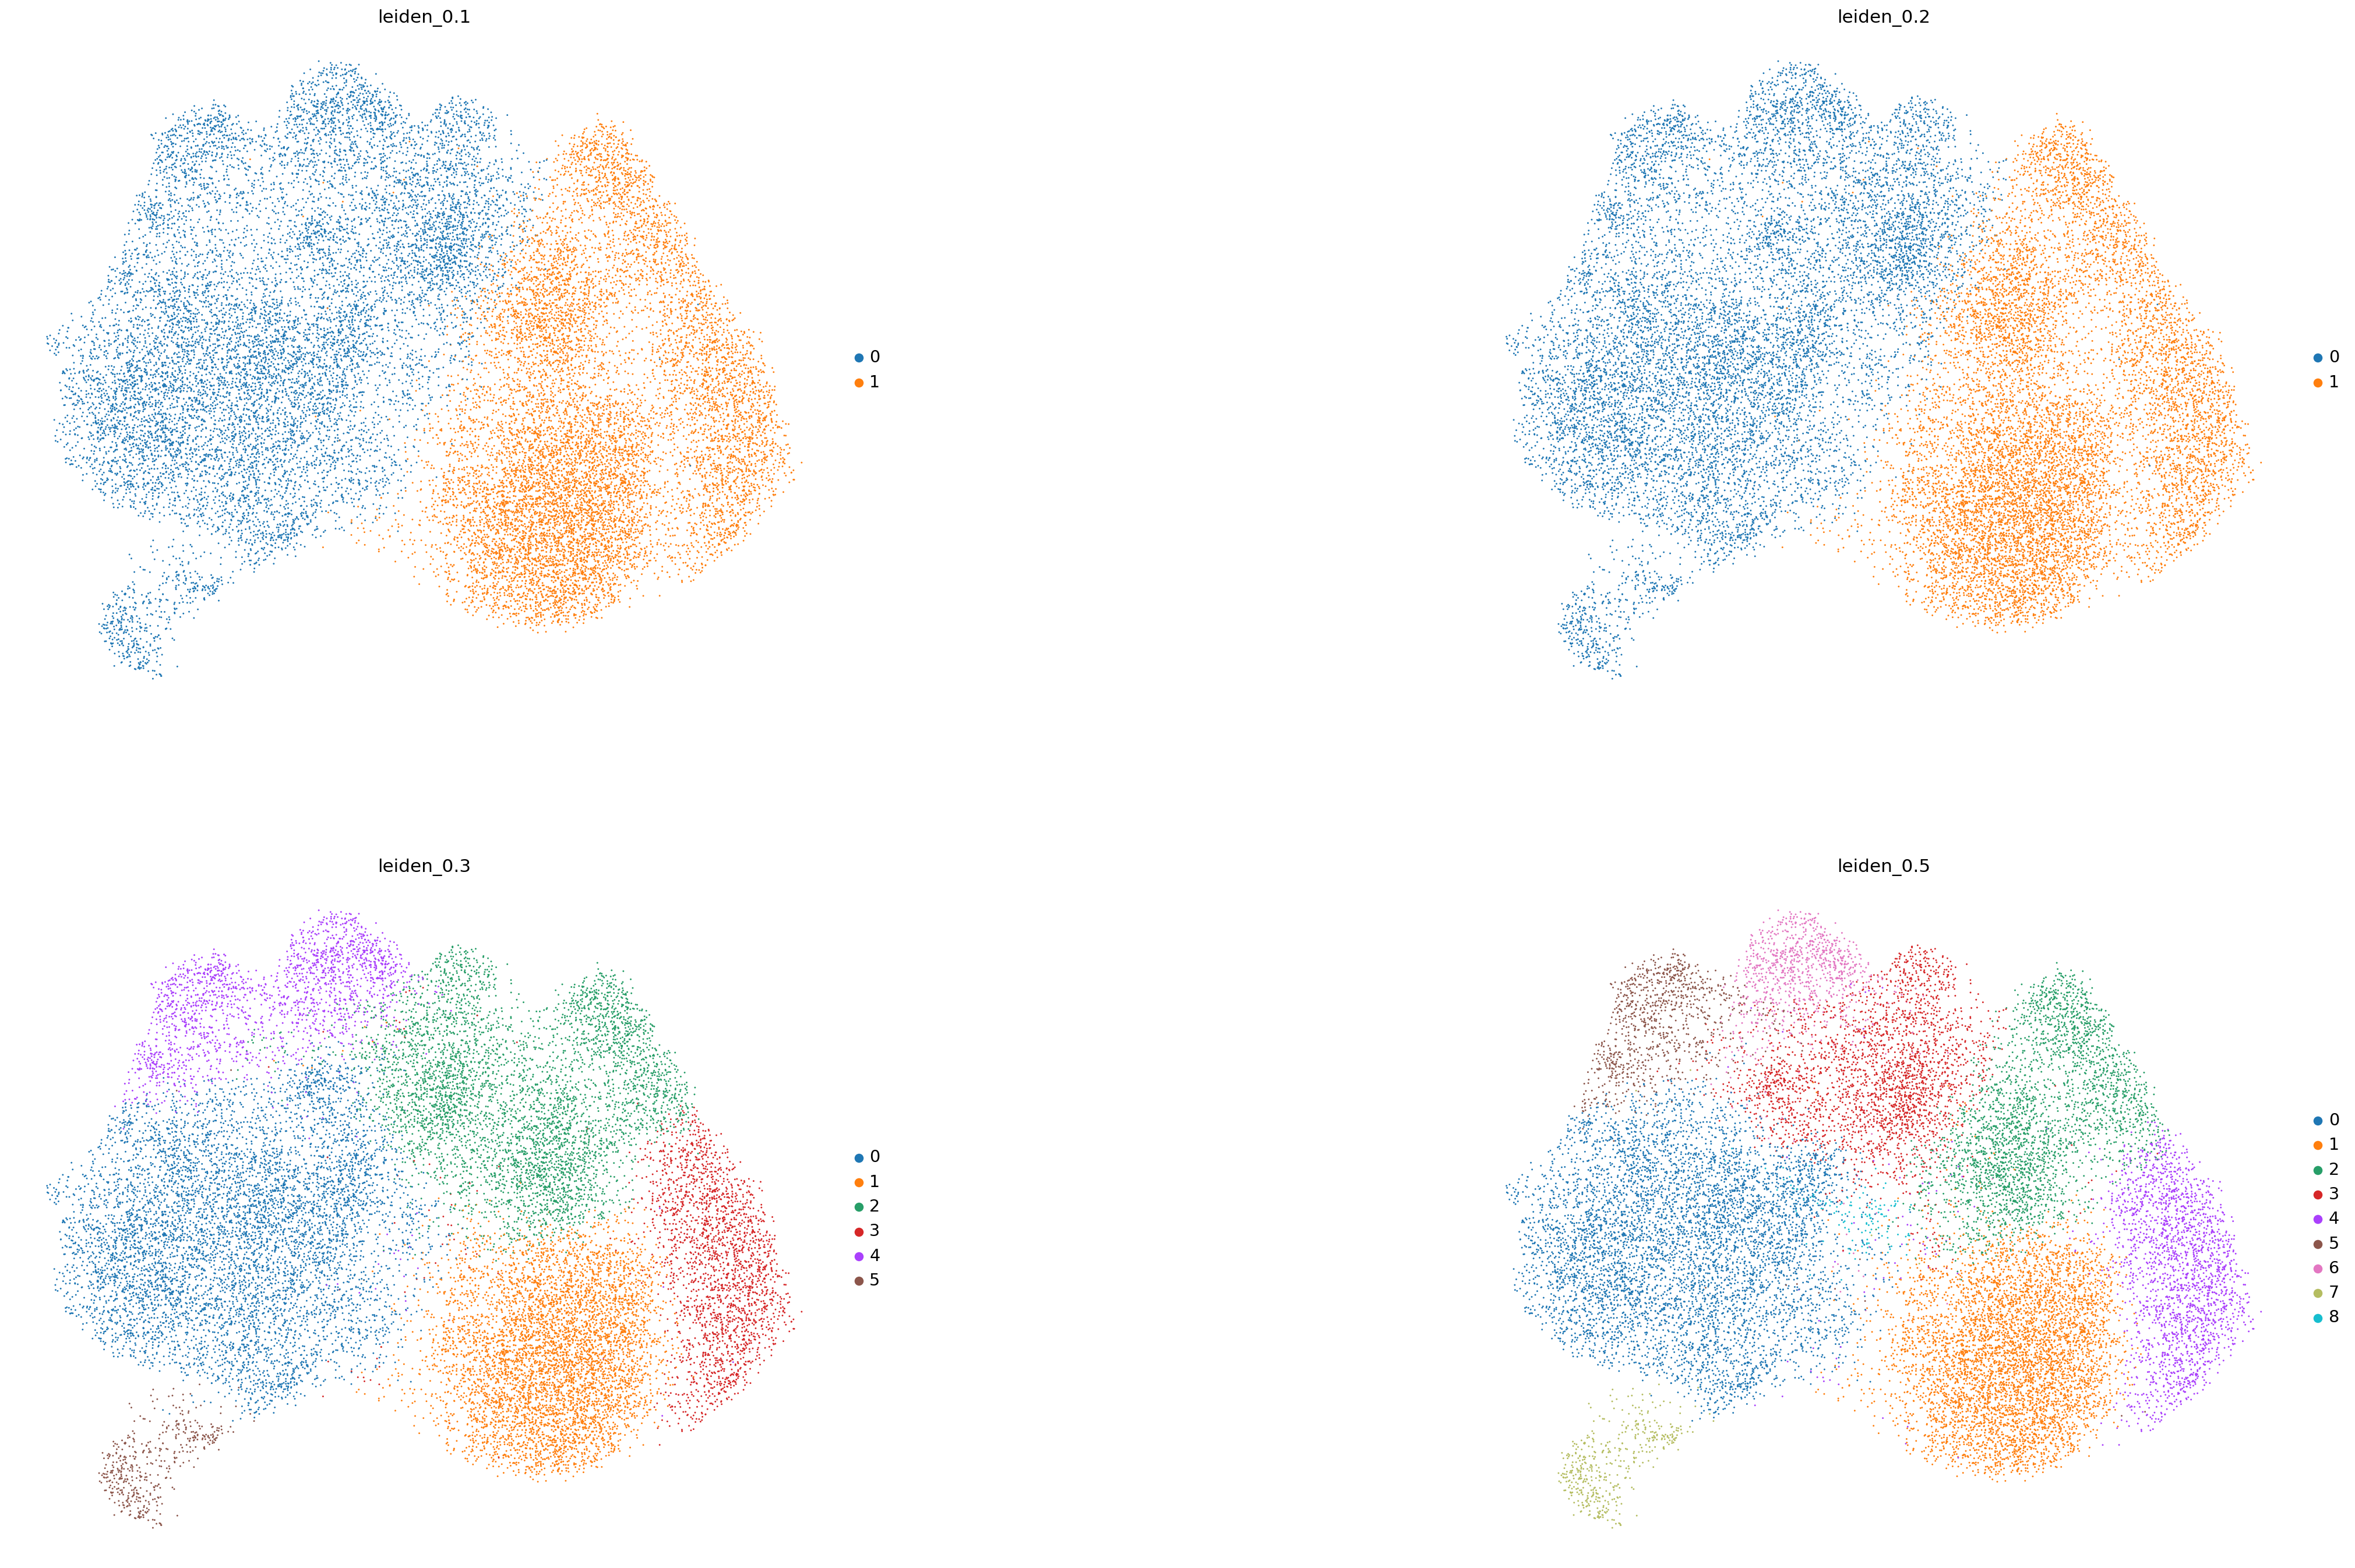

In [ ]:
sc.pl.umap(
    adata=embed_disease,
    color=["leiden_0.1", "leiden_0.2", "leiden_0.3", "leiden_0.5"],
    size=7,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

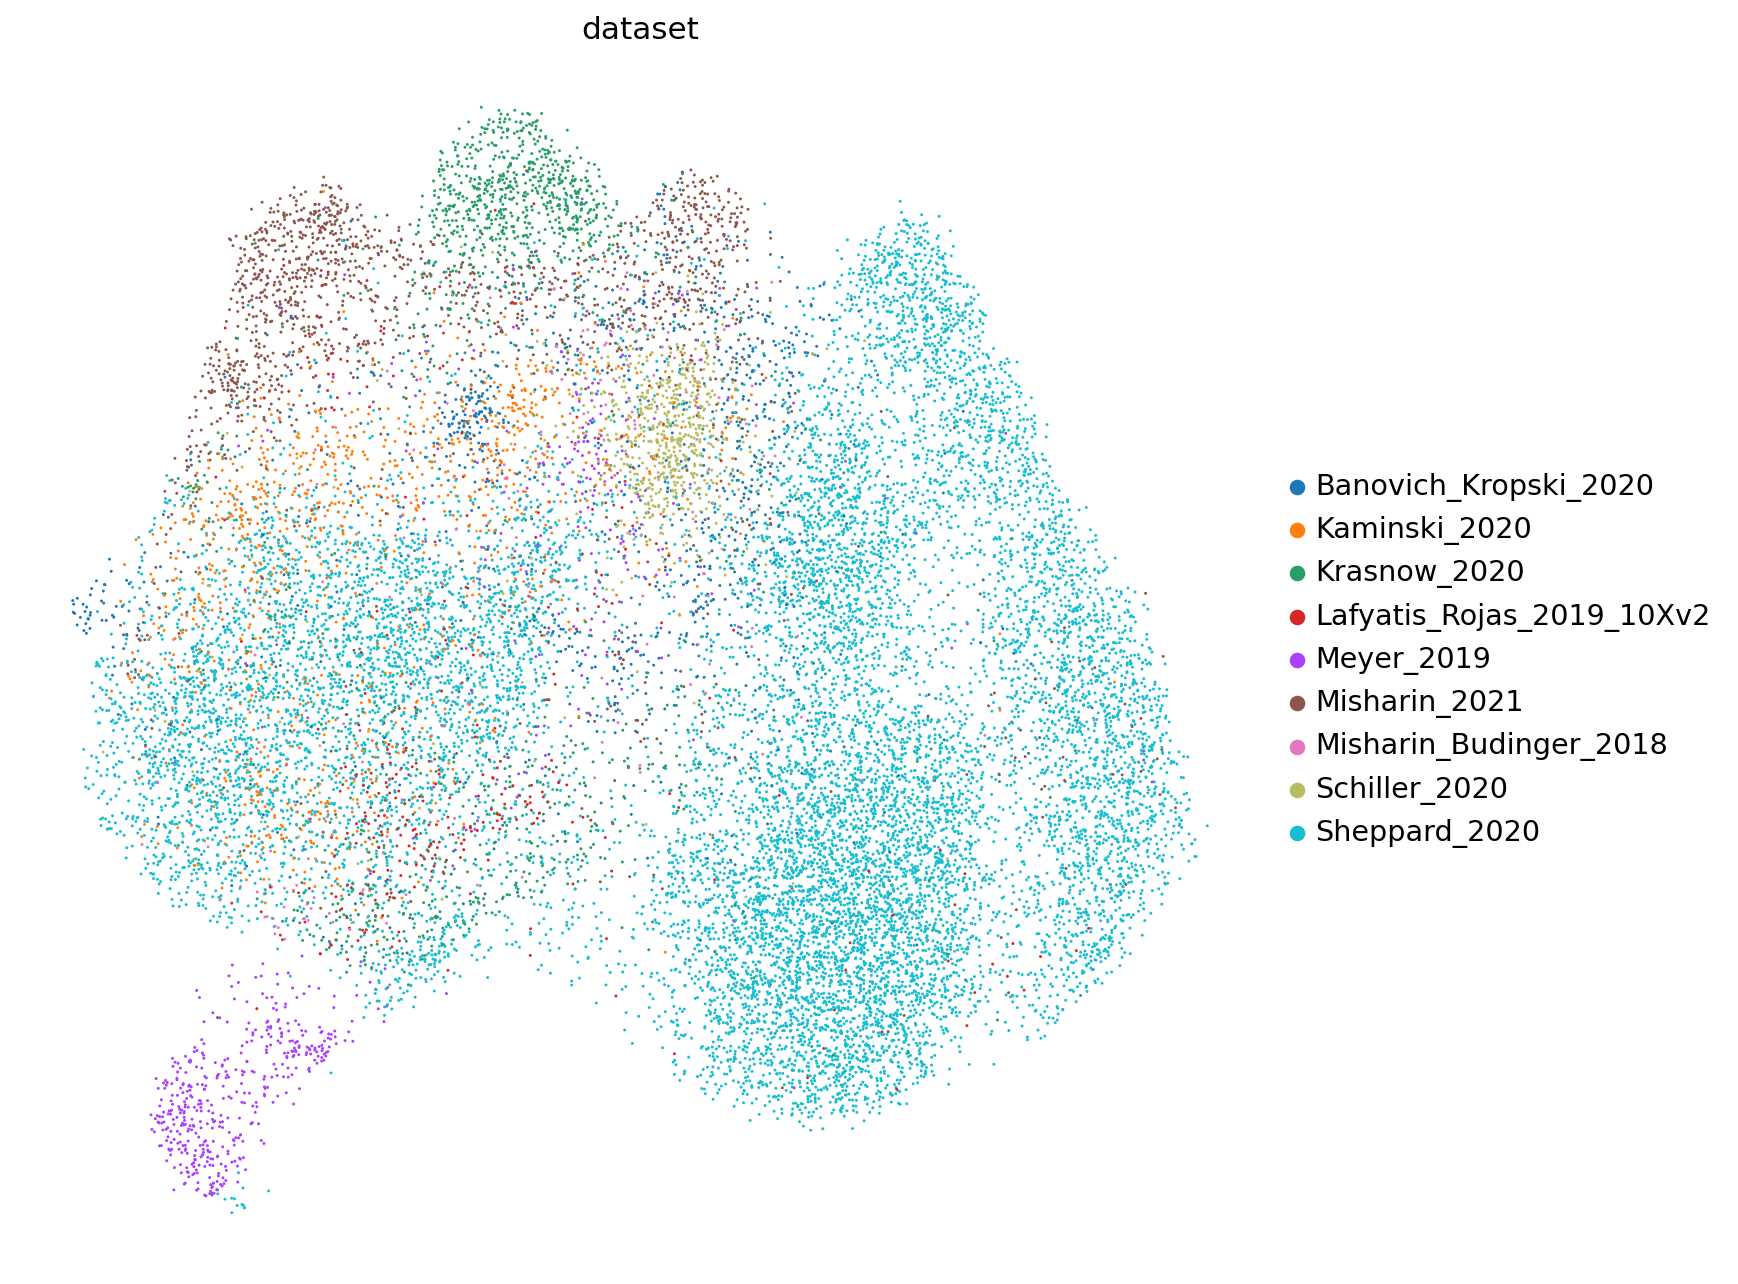

In [51]:
sc.pl.umap(
    adata=embed_disease,
    color=["dataset"],
    size=7,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

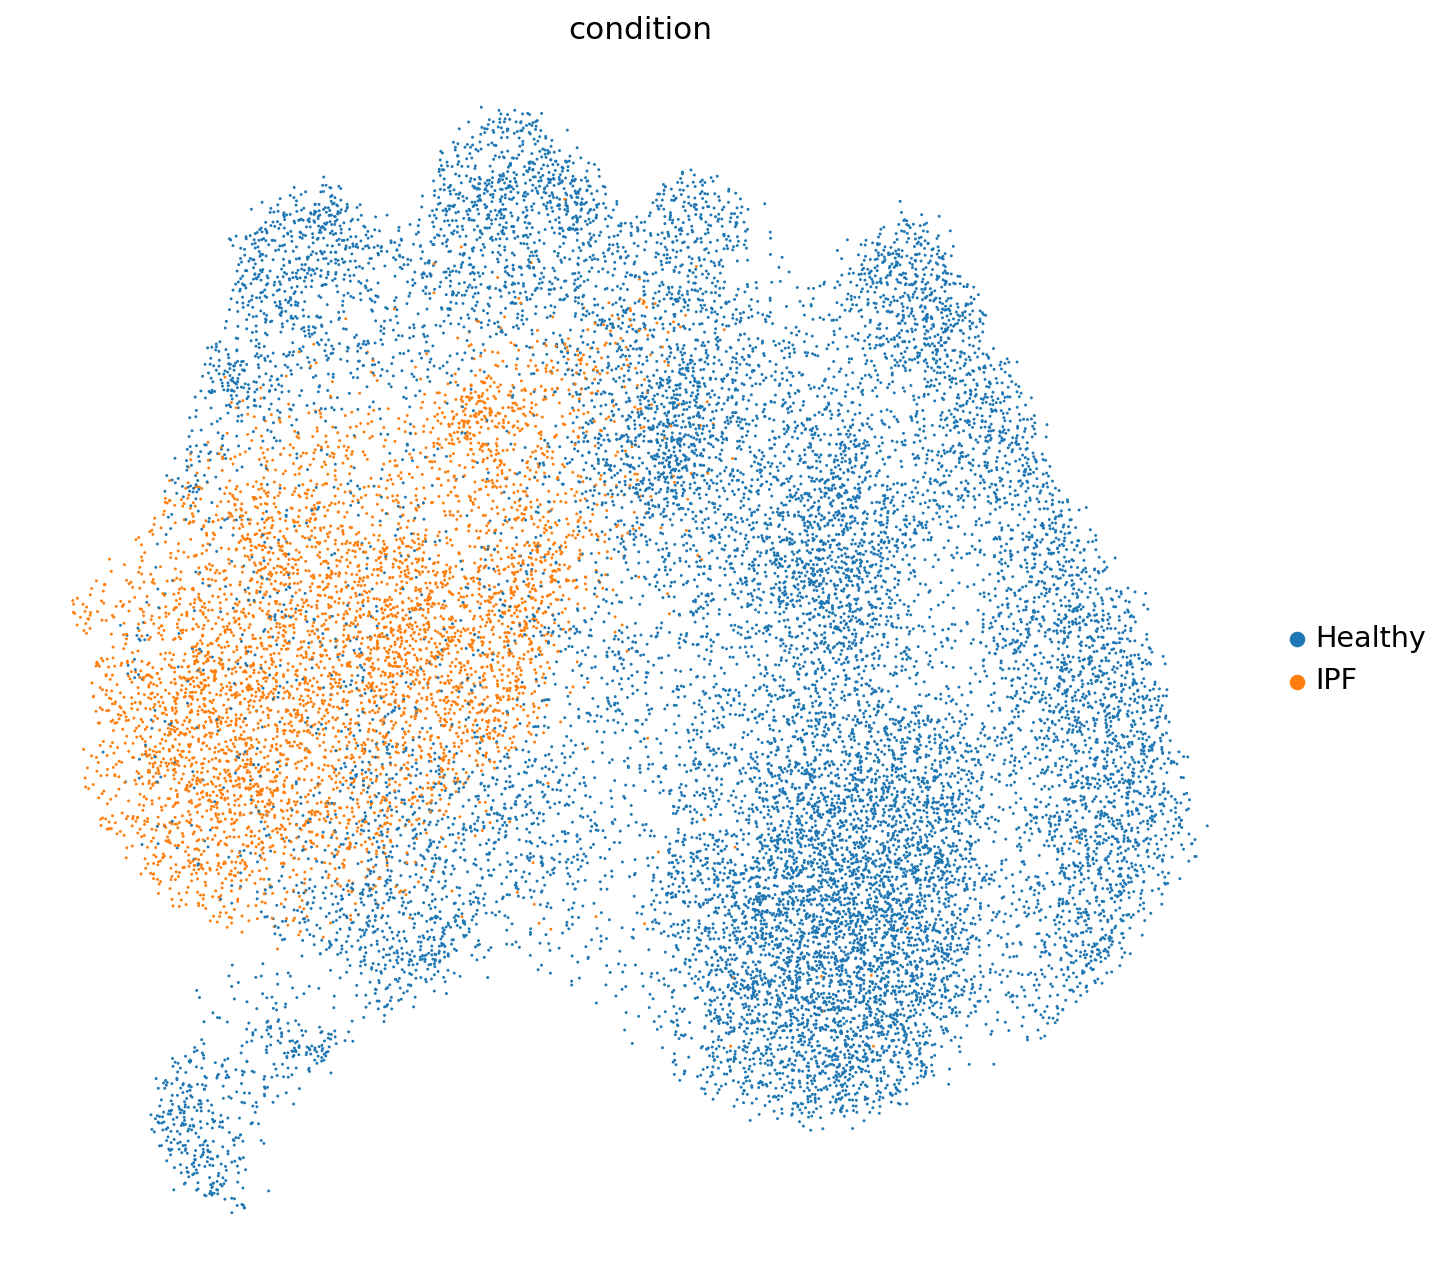

In [52]:
sc.pl.umap(
    adata=embed_disease,
    color=["condition"],
    size=7,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

### Save <a class="anchor" id="bullet6"></a>

In [53]:
embed_disease

AnnData object with n_obs × n_vars = 21496 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new',

In [55]:
print(f"Saving to: {embed_out}")
embed_disease.write(filename=embed_out)

Saving to: ../../../data/HLCA_extended/extension_disease/scarches_emb_ipf_alveolar-fibroblasts.h5ad


Done.